# 10_SGD

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
cali = fetch_california_housing()

In [5]:
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
cali.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
df = pd.DataFrame(cali.data, columns=cali.feature_names)

In [8]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [9]:
df['target'] = cali.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


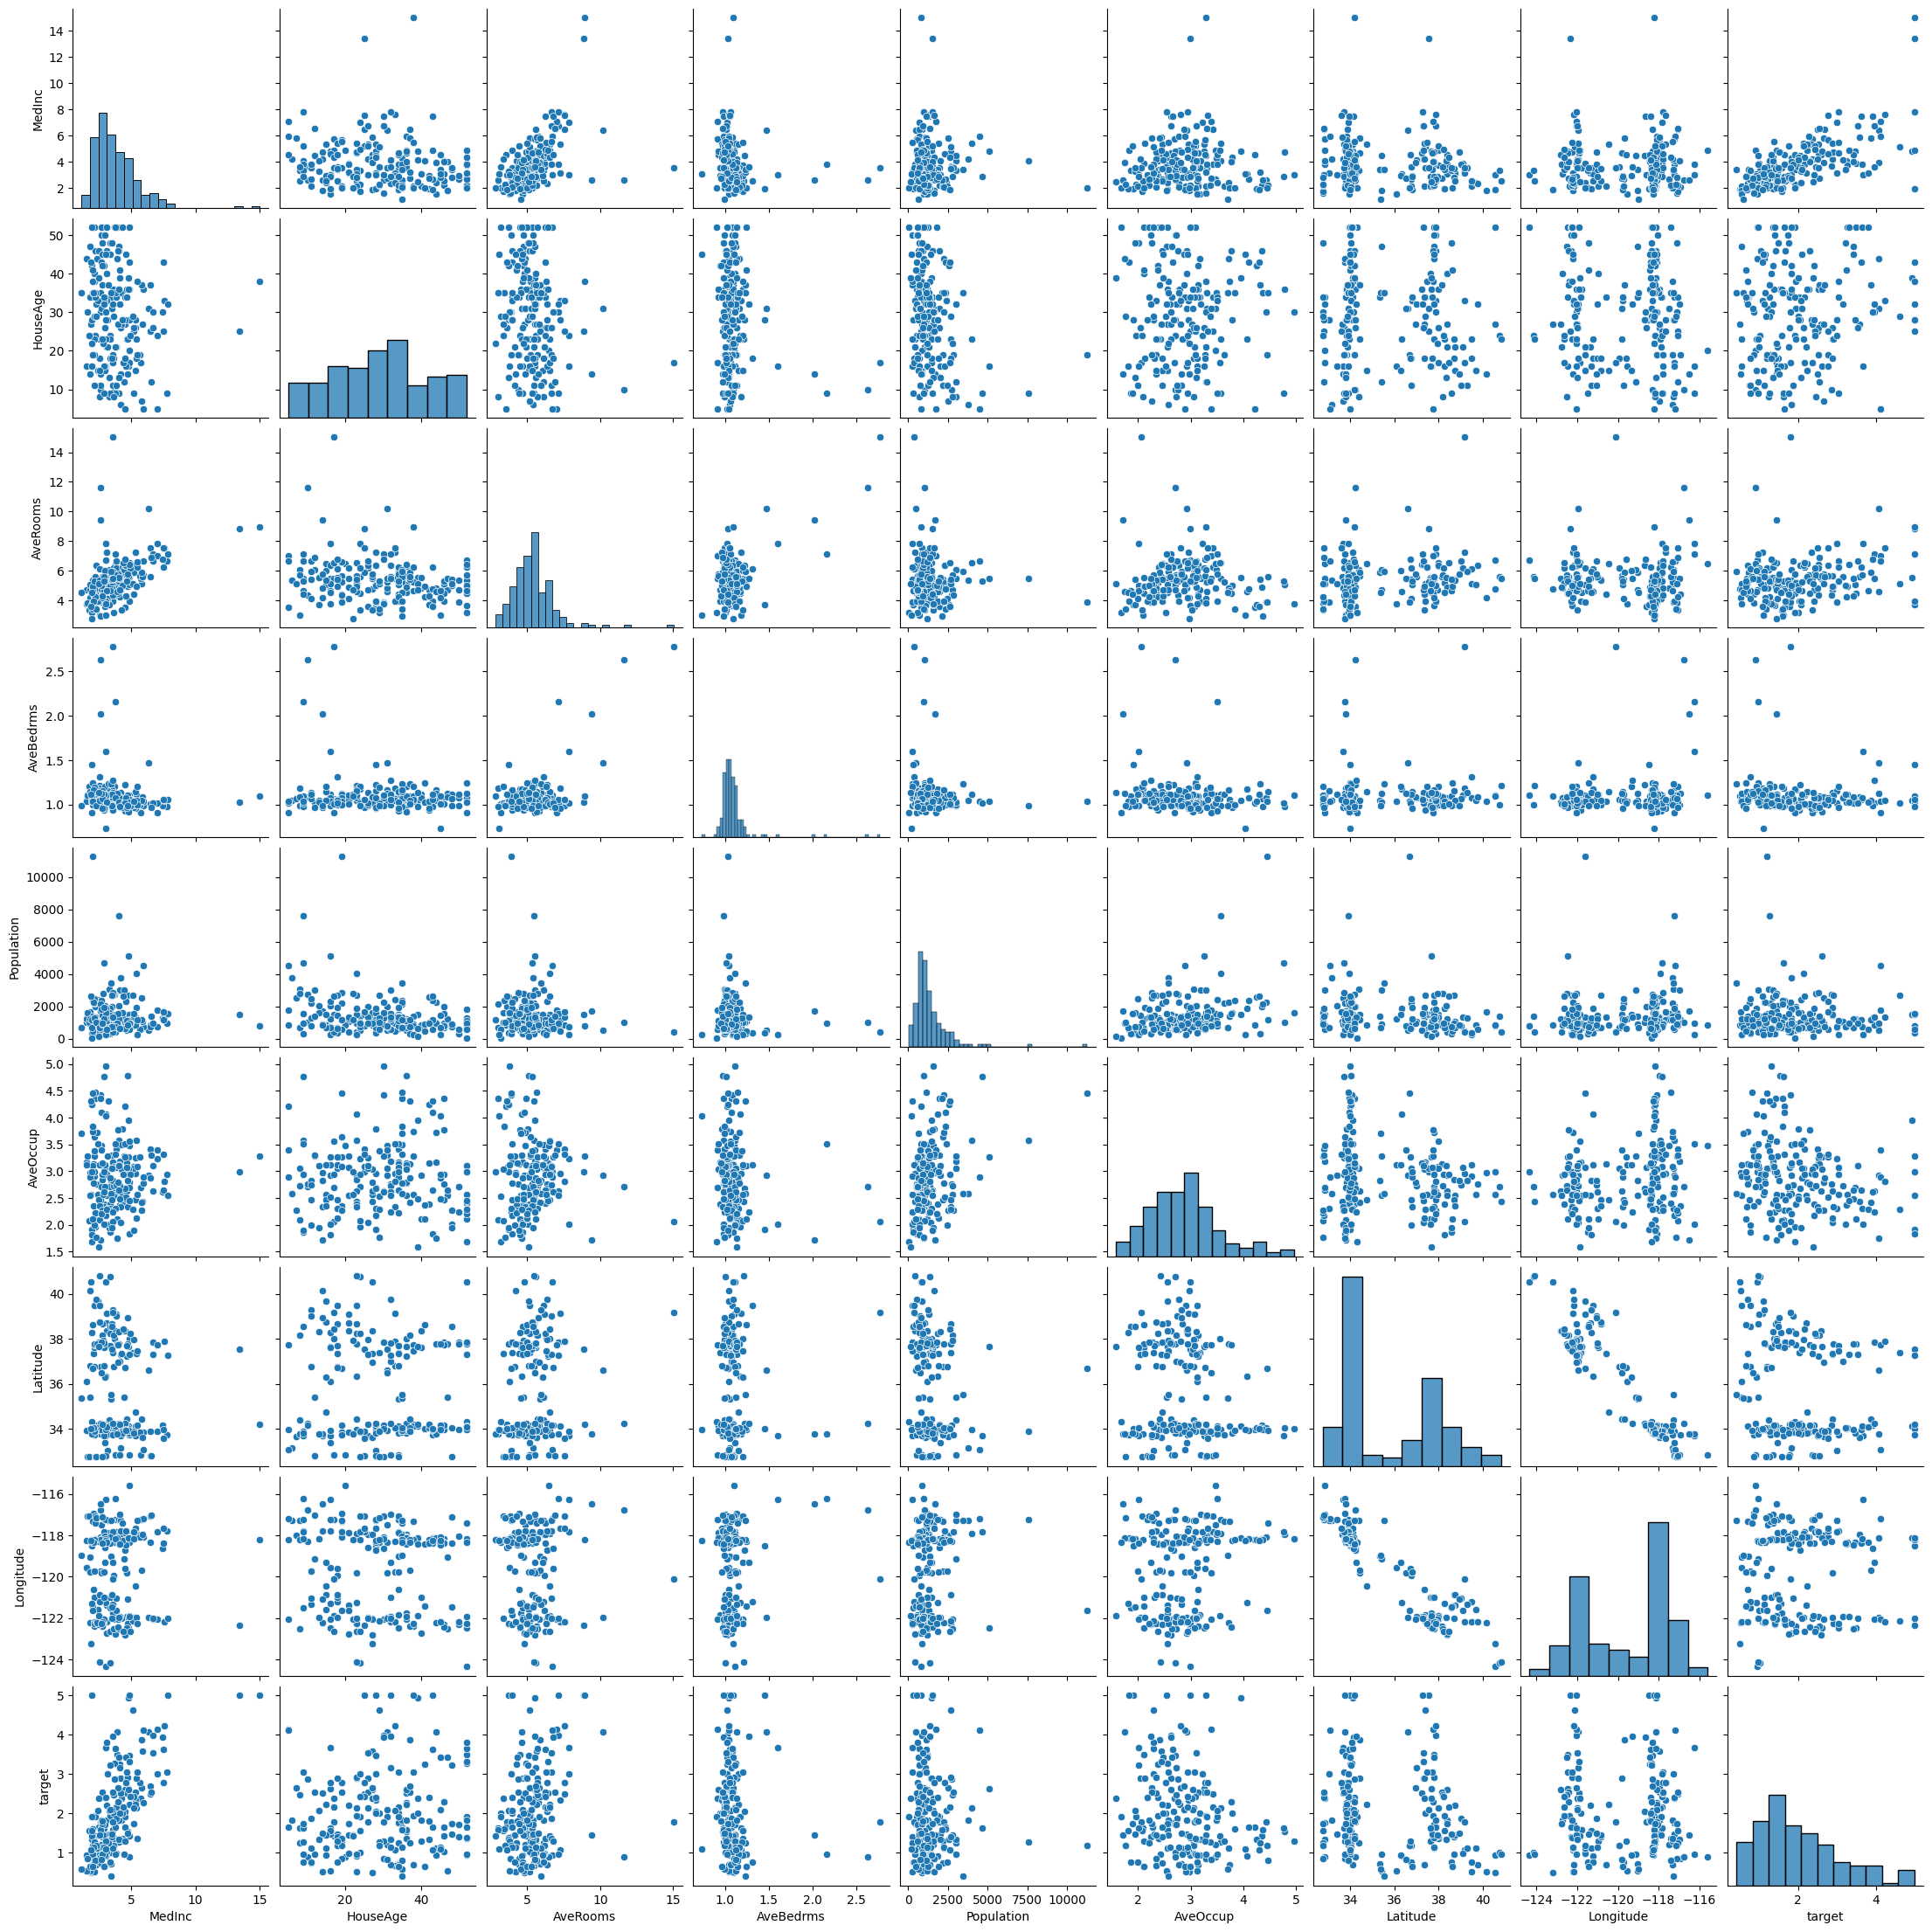

In [10]:
sns.pairplot(df.sample(200))
plt.show()

In [11]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] = scaler.transform(df.values[:, :-1])

df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847
20639,-0.780129,-1.004309,-0.070443,0.138403,-0.033977,-0.043682,1.750146,-0.833696,0.894


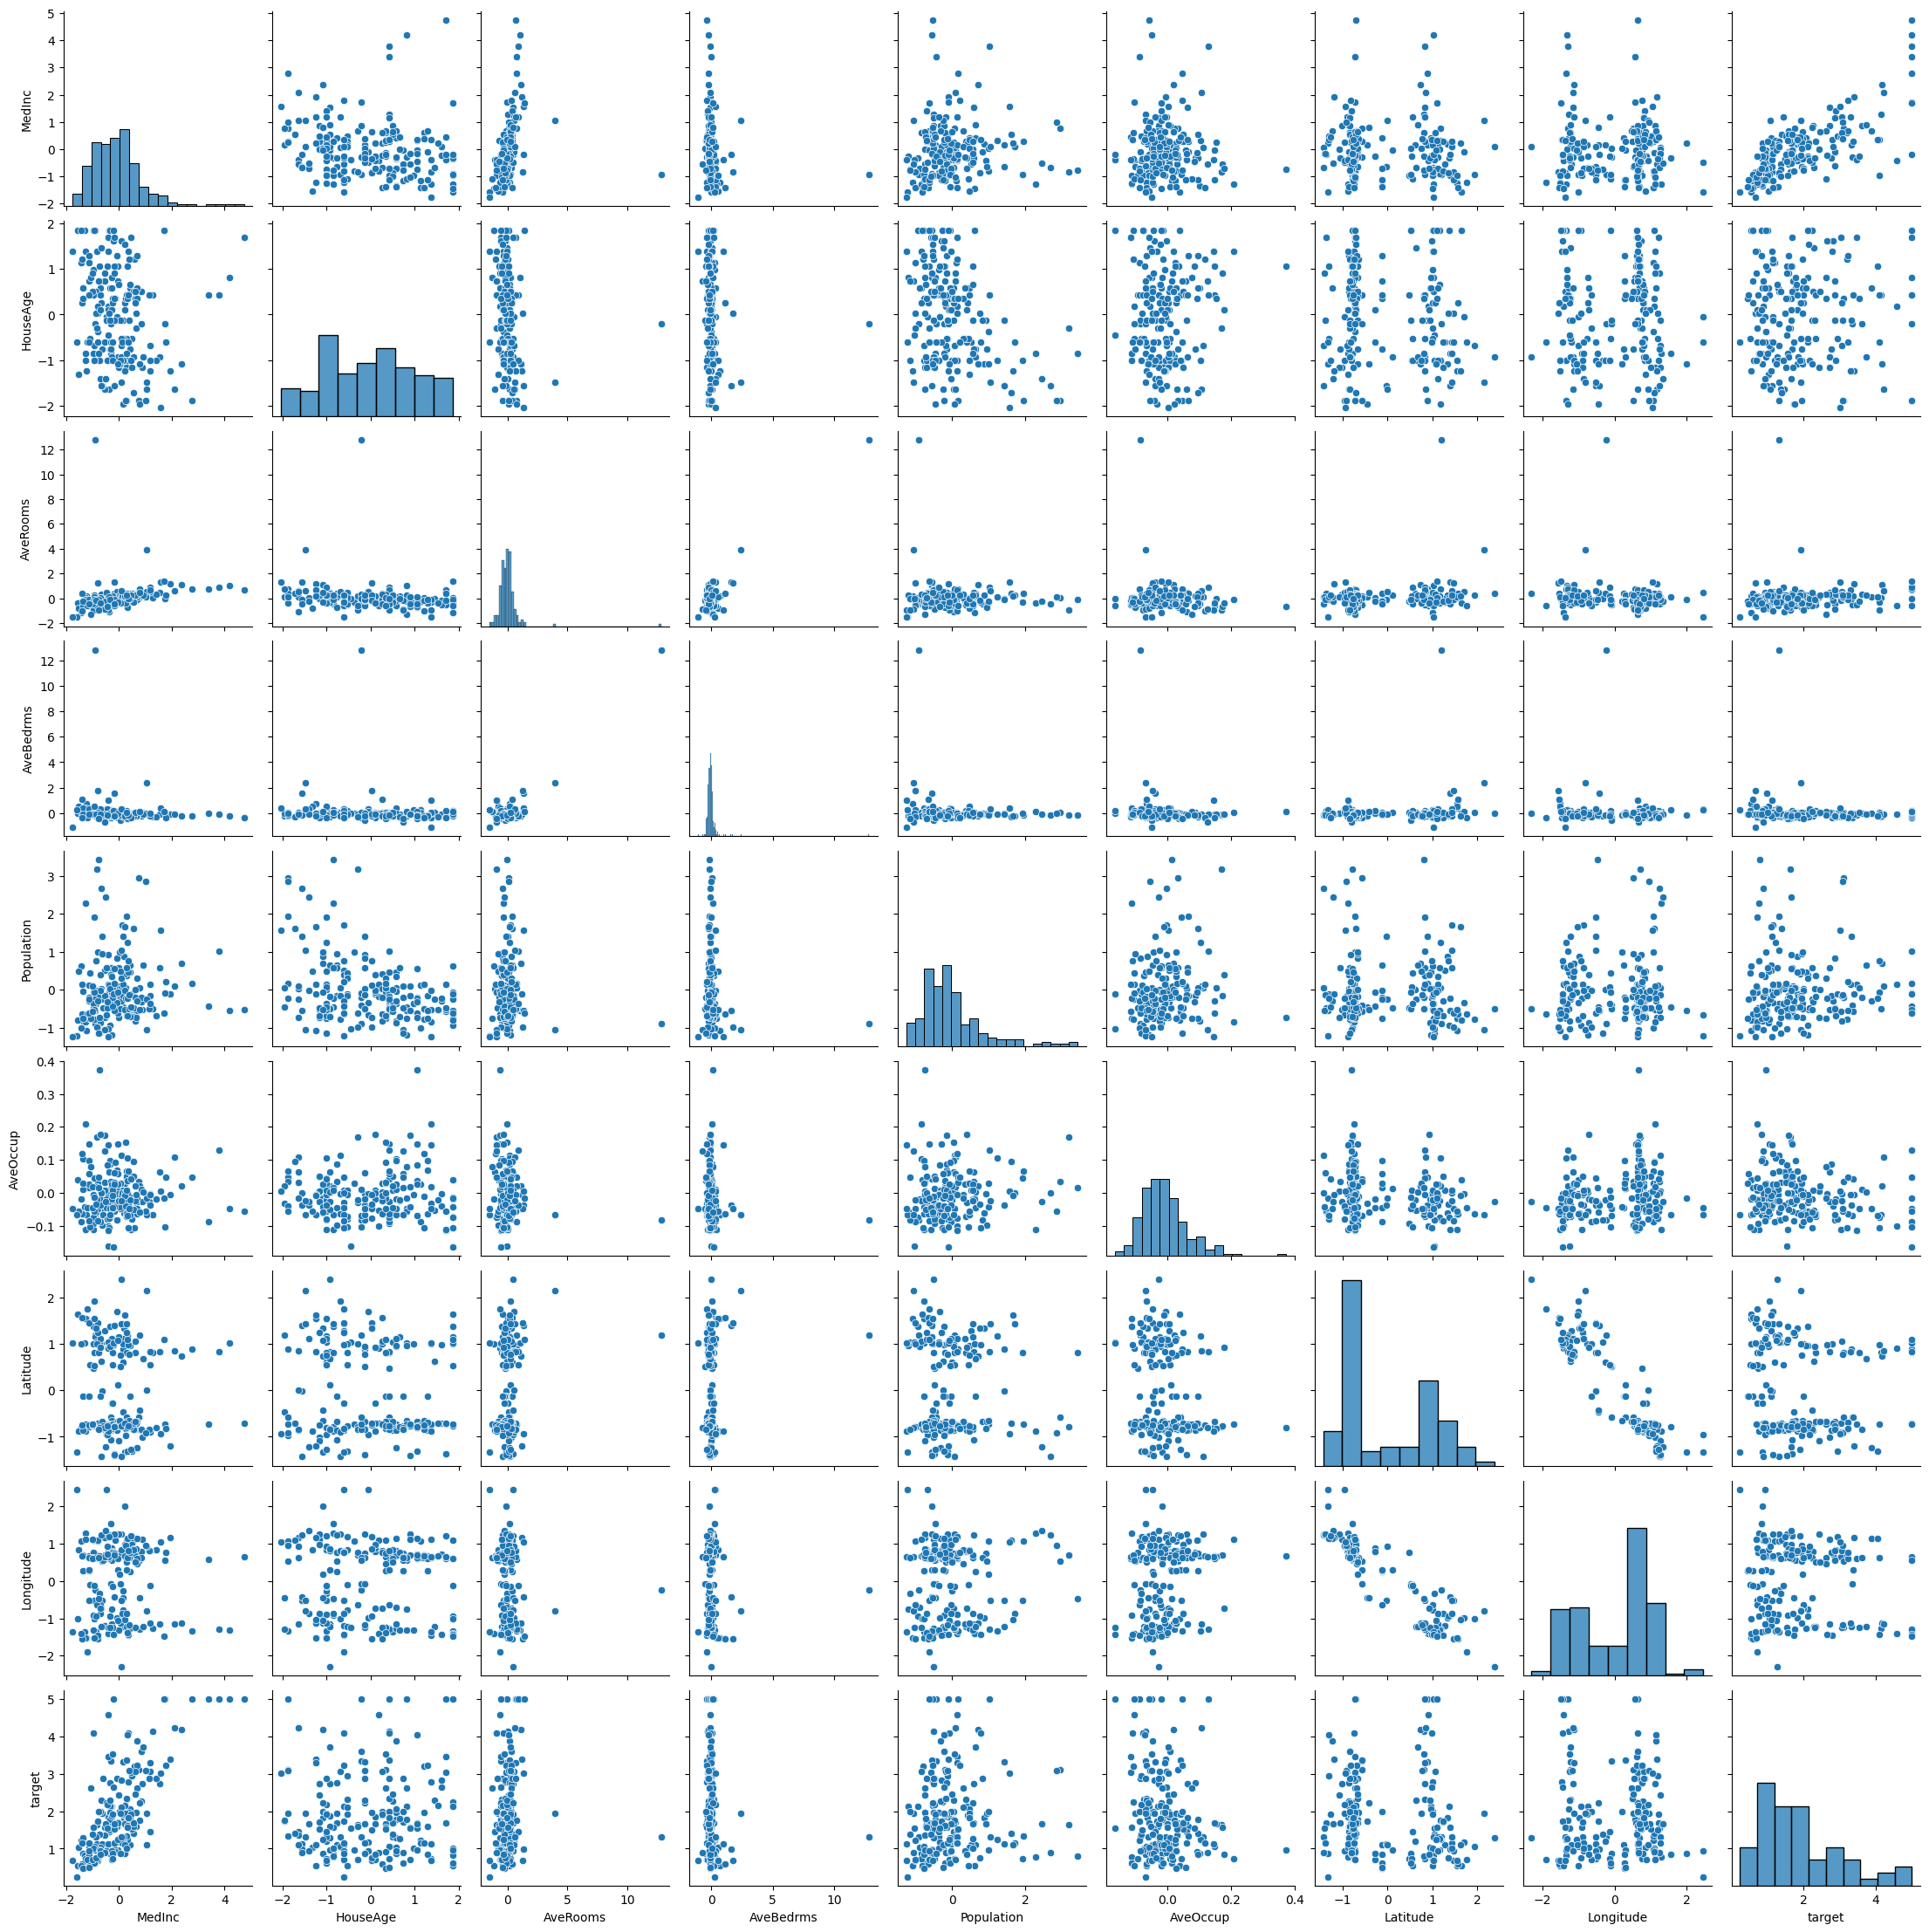

In [12]:
sns.pairplot(df.sample(200))
plt.show()

In [25]:
data = torch.from_numpy(df.values)
data.dtype

torch.float64

In [26]:
data = data.float()
data.dtype

torch.float32

In [27]:
data.shape

torch.Size([20640, 9])

In [28]:
x = data[:,:-1]
y = data[:, -1:]

In [29]:
epochs = 1000
batch = 256
interval = 100
lr = 1e-2

In [30]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 6),
    nn.LeakyReLU(),
    nn.Linear(6, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 2),
    nn.LeakyReLU(),
    nn.Linear(2, y.size(-1)))

model

Sequential(
  (0): Linear(in_features=8, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=4, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=4, out_features=2, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=2, out_features=1, bias=True)
)

In [31]:
optimizer = optim.SGD(model.parameters(), lr = lr)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [32]:
for i in range(epochs):
    indices = torch.randperm(x.size(0))
    x_ = torch.index_select(x, dim=0, index = indices)
    y_ = torch.index_select(y, dim=0, index = indices)
    
    x_ = x_.split(batch, dim=0)
    y_ = y_.split(batch, dim=0)
    
    y_hat = []
    total_loss = 0
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        total_loss += float(loss)
        
        y_hat += [y_hat_i]
    
    total_loss = total_loss / len(x_)
    
    if (i+1) % interval == 0:
        print('Epoch %d: loss=%.4e' % (i+1, total_loss))
y_hat = torch.cat(y_hat, dim=0)
y = torch.cat(y_, dim=0)

Epoch 100: loss=3.5779e-01
Epoch 200: loss=3.3979e-01
Epoch 300: loss=3.2888e-01
Epoch 400: loss=3.2454e-01
Epoch 500: loss=3.2144e-01
Epoch 600: loss=3.2052e-01
Epoch 700: loss=3.1905e-01
Epoch 800: loss=3.1708e-01
Epoch 900: loss=3.1527e-01
Epoch 1000: loss=3.1615e-01


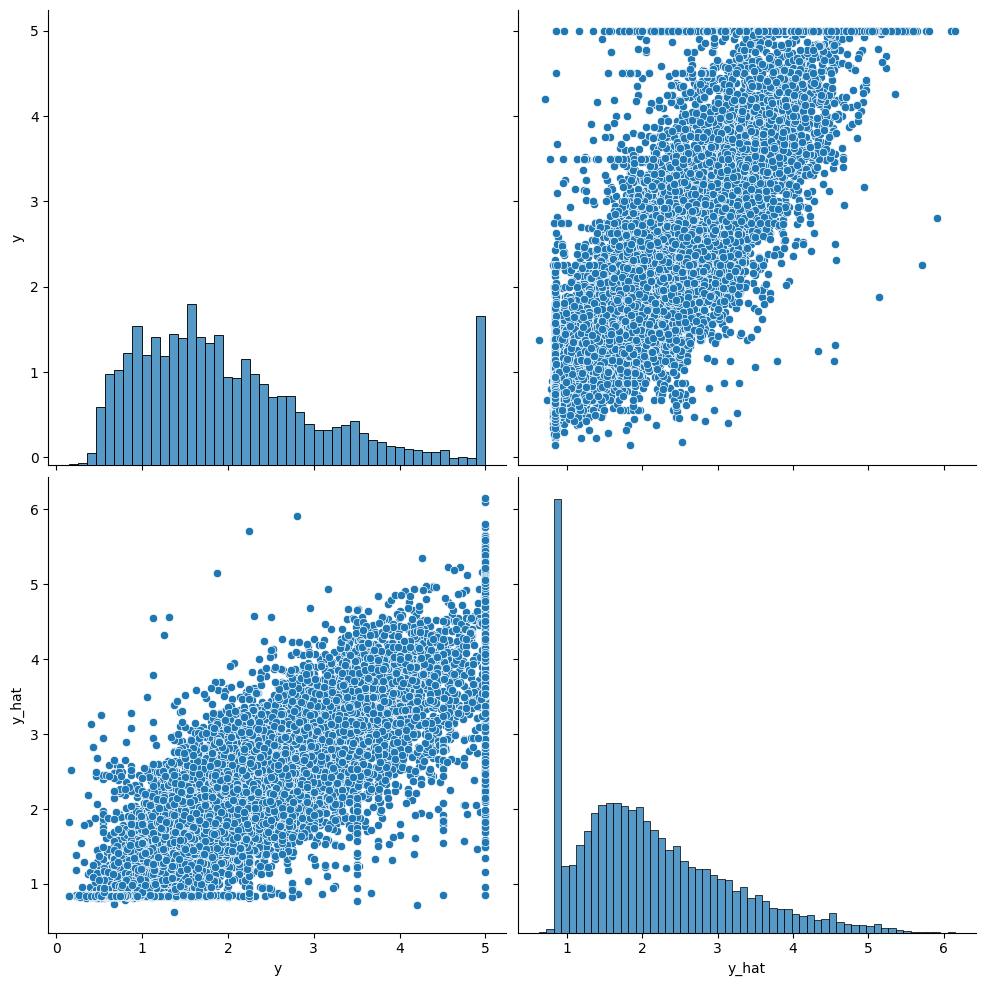

In [33]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=['y', 'y_hat'])
sns.pairplot(df, height=5)
plt.show()

In [ ]:
lowest_l